# Project: Wrangling and Analyze Data

In [1]:
#Install missing libraries
#Restart the kernel after installing libraries
!pip install --upgrade plotly
!pip install missingno
!pip install --upgrade pandas==1.1.5
!pip install --upgrade ipywidgets>=7.2
!pip install --upgrade tensorflow-tensorboard==0.1.1
!pip --disable-pip-version-check install requests

Requirement already up-to-date: plotly in /opt/conda/lib/python3.6/site-packages (5.9.0)
Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)
  Using cached https://files.pythonhosted.org/packages/7c/69/35b5fd3571a32faa0121cf79cb6acd33156de000f60a74cbdd1e77a5bf9b/tensorflow_tensorboard-0.1.1-py3-none-any.whl
  Found existing installation: Markdown 2.6.9
Cannot uninstall 'Markdown'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [2]:
#Import libraries
import pandas as pd
import json
import requests
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action = 'ignore')
%matplotlib inline

In [3]:
print("Pandas version " + pd.__version__) #requires minimum pandas 1.1.5

Pandas version 1.1.5


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

Assign url to use in get() method

In [5]:
url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

Use get() method to send a GET request to the url page

In [6]:
data = requests.get(url, auth=('user','pass'))

Check the status code of the request

In [7]:
print(data.status_code)

200


Write the response to an output file

In [8]:
with open(r'image_predictions.tsv', mode='wb') as f :
    f.write(data.content)

Load the file into a pandas dataframe

In [9]:
image_predictions = pd.read_csv('./image_predictions.tsv', delimiter='\t')
image_predictions.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

3. Upload and read additional Tweet data from tweet_json.txt file

In [10]:
tweet_list=[]

with open('tweet_json.txt', 'r') as file:
    for tweet in file:
        tweets = json.loads(tweet)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        #followers_count = tweets['user']['followers_count']
        #user_favorites = tweets['user']['user_favorites']
        created_at = tweets['created_at']
        tweet_list.append({'tweet_id': tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count,
                          'created_at':created_at})

Load the list into a dataframe

In [11]:
tweet_json_data = pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count','created_at'])
tweet_json_data.head(1)

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           8853           39467   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017

## Gathering summary

The first step of the data wrangling process involved gathering data from the following sources and loading it into pandas dataframe:

1. Getting tweet data from a pre-existing file - *twitter-archive-enhanced.csv*
2. Using the requests library to download the *image_predictions.tsv* file from the internet
3. Reading tweet data from the pre-existing *tweet_json.txt* json file

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Describe each column in each table

In [12]:
#Display the table
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

This is a tweet archive of Twitter user @dog_rates, also known as WeRateDogs. It is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. 



*twitter_archive* columns:

* **tweet_id** : a unique identification number generated by Twitter for each tweet
* **in_reply_to_status_id** : if the tweet is a reply, this field wil represent the original tweet's ID
* **in_reply_to_user_id**: if the tweet is a reply, this field will contain an integer representation of the original tweets author ID
* **timestamp**: date and time information corresponding to the dat of creation of the tweet
* **source**: Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web. The unique values are Twitter fro iphone, Twitter web client, TweetDeck and the now defunct vine
* **text**: the actual text of the status update in utf-8 encoding 
* **retweet_status_id**: if the tweet is a retweet, this field will contain an integer representation of the original tweet's ID
* **retweeted_status_user_id**: if the tweet is a retweet, this field will contain an integer representation of the original tweet's author ID
* **expanded_url** : the url address of the tweet on twitter
* **rating_numerator**: the numerator derived from the dog's rating in fraction form obtained from the tweet text
* **rating_denominator**: the denominator derived from the dog's rating in fraction form obtained from the tweet text
* **name**: the name of the dog being referred to in the tweet text
* **doggo**: label for a dog given to a big pupper that is usually older
* **floofer**: label for a dog given to dogs with seemingly excessive fur 
* **pupper**: label for a dog given to a small 'doggo' that is usually younger alternatively a doggo that is inexperienced or unfamiliar with the responsibilities of being a 'doggo'
* **puppo**: label for a dog that is in a transitional phase between a pupper and a doggo
    

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
datatype = twitter_archive.dtypes #checks the datatype of the column
sum_na = twitter_archive.isna().sum() #the sum of any missing values in each column
na_ = twitter_archive.isna().any() #checks for any missing values
info = pd.concat([na_,sum_na,datatype], axis=1, keys=['na_', 'sum_na','datatype'])
print(info)

                              na_  sum_na datatype
tweet_id                    False       0    int64
in_reply_to_status_id        True    2278  float64
in_reply_to_user_id          True    2278  float64
timestamp                   False       0   object
source                      False       0   object
text                        False       0   object
retweeted_status_id          True    2175  float64
retweeted_status_user_id     True    2175  float64
retweeted_status_timestamp   True    2175   object
expanded_urls                True      59   object
rating_numerator            False       0    int64
rating_denominator          False       0    int64
name                        False       0   object
doggo                       False       0   object
floofer                     False       0   object
pupper                      False       0   object
puppo                       False       0   object


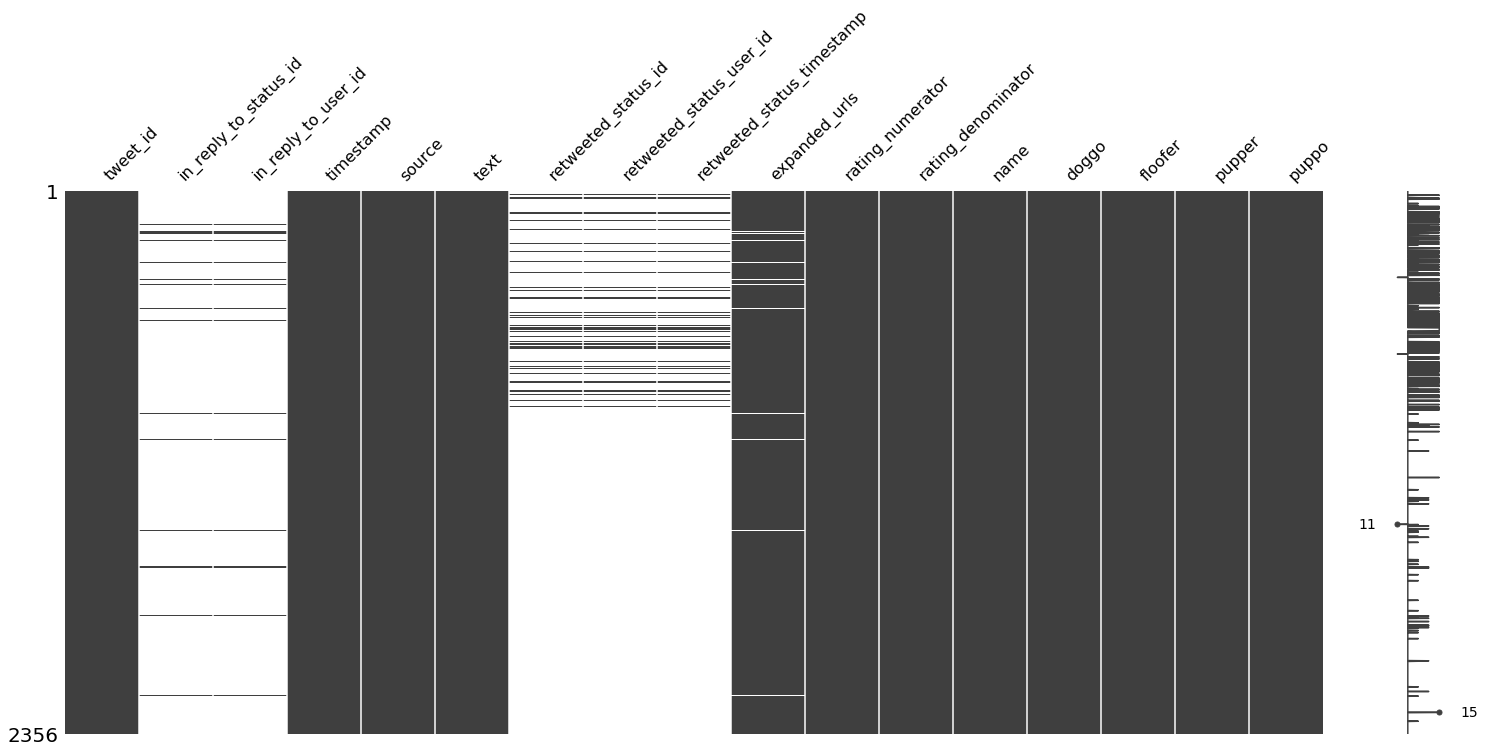

In [15]:
#Check the distribution of missing values
msno.matrix(twitter_archive);

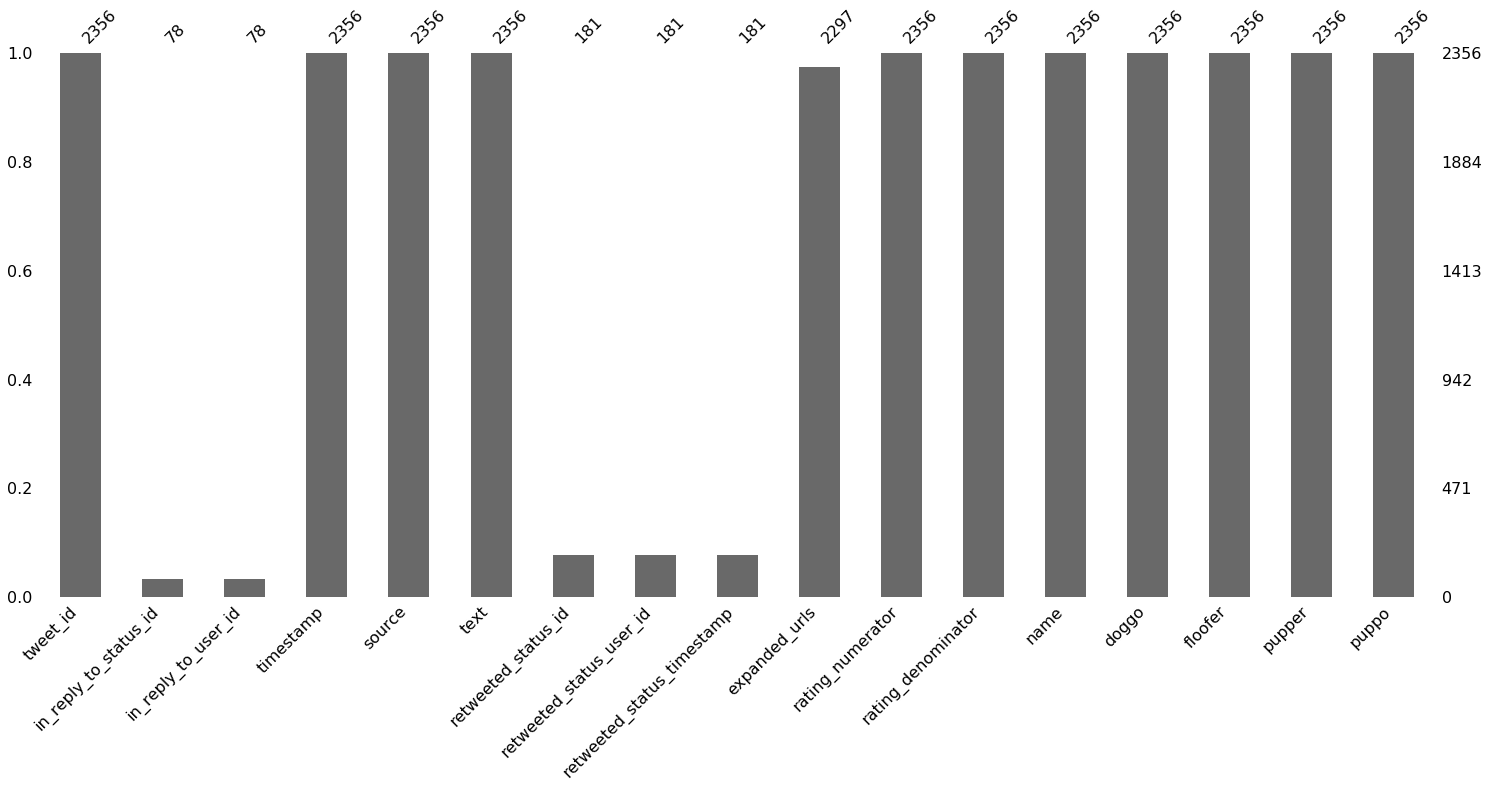

In [16]:
#Check the distribution of missing values
msno.bar(twitter_archive);

* There are some missing values in the 'expanded_urls' column.
* Some of the tweets included in the archive are replies and retweets

In [17]:
#Check for duplicated rows
twitter_archive[twitter_archive.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

Check the rating numerator and rating denominator columns

In [18]:
numerical_features = ['rating_numerator','rating_denominator']
twitter_archive[numerical_features].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [19]:
#Check the value counts in the rating_denominator column
twitter_archive.rating_denominator.value_counts().sort_values()

70        1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
0         1
40        1
16        1
2         1
7         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

In [20]:
#Check the unique values in the column
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [21]:
#Check the unique values in the column
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

* Majority of the rating denominators are of the value 10, hence we can assume that any value above 10 can be treated as an error.

In [22]:
twitter_archive.query('rating_numerator == 0')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
315   https://twitter.com/dog_rates/status/835152434...                 0   
1016  https://twitter.com/dog_rates/status/746906459...                 0   

      rating_denominator  name doggo floofer pupper puppo  
315                   10  None  None    None   None  None  
1016                  10  None  None    None   None  None

In [23]:
twitter_archive.query('rating_denominator == 0')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

* There are some dogs that posses either a rating numerator or rating denominator of 0

In [24]:
twitter_archive.query('rating_numerator == 1776')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
979  749981277374128128                    NaN                  NaN   

                     timestamp  \
979  2016-07-04 15:00:45 +0000   

                                                source  \
979  <a href="https://about.twitter.com/products/tw...   

                                                  text  retweeted_status_id  \
979  This is Atticus. He's quite simply America af....                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
979                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
979  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name doggo floofer pupper puppo  
979                  10  Atticus  None    None   None  None

In [25]:
twitter_archive.query('rating_denominator > 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
342            @docmisterio account started on 11/15/15                  NaN   
433   The floofs have been released I repeat the flo...                  NaN   
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behav

In [26]:
print("There are {} rating denominators that are greater than 10."
      .format(len(twitter_archive.query('rating_denominator > 10'))))

There are 20 rating denominators that are greater than 10.


Check the name column

In [27]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Tonks         1
Mauve         1
Brudge        1
Bloo          1
Meatball      1
Name: name, Length: 957, dtype: int64

In [28]:
twitter_archive[twitter_archive.name == 'None']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
5     2017-07-29 00:08:17 +0000   
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2342  2015-11-16 02:38:37 +0000   
2343  2015-11-16 01:59:36 +0000   
2344  2015-11-16 01:52:02 +0000   
2351  2015-11-16 00:24:50 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
5     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2342  <a href="http://twitter.com/download/iphone" r...   
2343  <a href="http://twitter.com/download/iphone" r...   
2344  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
5     Here we have a majestic great white breaching ...                  NaN   
7     When you watch your owner call another dog a g...                  NaN   
12    Here's a puppo that seems to be on the fence a...                  NaN   
24    You may not have known you needed to see this ...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
...                                                 ...                  ...   
2342  Here we have a well-established sunblockerspan...                  NaN   
2343  Let's hope this flight isn't Malaysian (lol). ...                  NaN   
2344  Here we have a northern speckled Rhododendron....                  NaN   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
5                          NaN                        NaN   
7                          NaN                        NaN   
12                         NaN                        NaN   
24                         NaN                        NaN   
25                         NaN                        NaN   
...                        ...                        ...   
2342                       NaN                        NaN   
2343                       NaN                        NaN   
2344                       NaN                        NaN   
2351                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
5     https://twitter.com/dog_rates/status/891087950...                13   
7     https://twitter.com/dog_rates/status/890729181...                13   
12    https://twitter.com/dog_rates/status/889665388...                13   
24    https://twitt

In [29]:
#Check the text column for ratinga that names labelled as 'None'
for text in twitter_archive.query("name == 'None'")['text'].head():
    print(text)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp


* There are dogs whose names have been labelled as None

Check the counts of the dog stages columns

In [30]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [31]:
#check the sum of the counts of the various dog stages
(twitter_archive.loc[:, 'doggo': 'puppo']!= 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [32]:
(twitter_archive.loc[:, 'doggo': 'puppo']!= 'None').sum().values.sum()

394

In [33]:
print ("There are only {} out of {} dogs that have been categorized into one of the four dog stages"
       .format((twitter_archive.loc[:, 'doggo': 'puppo']!= 'None').sum().values.sum(),
              len(twitter_archive)))

There are only 394 out of 2356 dogs that have been categorized into one of the four dog stages


Investigate the source column

In [34]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* Source is given in the format of a http address

### Image Predictions Table

In [35]:
#Display the table
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

The WeRateDogs twitter archive was run through a neural network to classify breeds of dogs. This resulted in a table with the top three predictions alongside each tweet id, image URL, and the image number that corresponded to the most  confident prediction (numbered 1 to 4 since tweets can have up to four images).

*image predictions* columns:

* **tweet_id**: a unique identification number generated by Twitter for each tweet
* **jpg_url**: the url address of the images
* **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
* **p1**: the algorithm's #1 prediction for the image in the tweet
* **p1_conf**: how confident the algorithm is in its #1 prediction
* **p1_dog**: whether or not the #1 prediction is a breed of dog
* **p2**: the algorithm's second most likely prediction
* **p2_conf**: how confident the algorithm is in its #2 prediction
* **p2_dog**: whether or not the #2 prediction is a breed of dog 
* **p3**: the algorithm's third most likely prediction
* **p3_conf**: how confident the algorithm is in its #3 prediction
* **p3_dog**: whether or not the #3 prediction is a breed of dog

Check for missing values

In [36]:
datatype = image_predictions.dtypes #checks the datatype of the column
sum_na = image_predictions.isna().sum() #the sum of any missing values in each column
na_ = image_predictions.isna().any() #checks for any missing values
info = pd.concat([na_,sum_na,datatype], axis=1, keys=['na_', 'sum_na','datatype'])
print(info)

            na_  sum_na datatype
tweet_id  False       0    int64
jpg_url   False       0   object
img_num   False       0    int64
p1        False       0   object
p1_conf   False       0  float64
p1_dog    False       0     bool
p2        False       0   object
p2_conf   False       0  float64
p2_dog    False       0     bool
p3        False       0   object
p3_conf   False       0  float64
p3_dog    False       0     bool


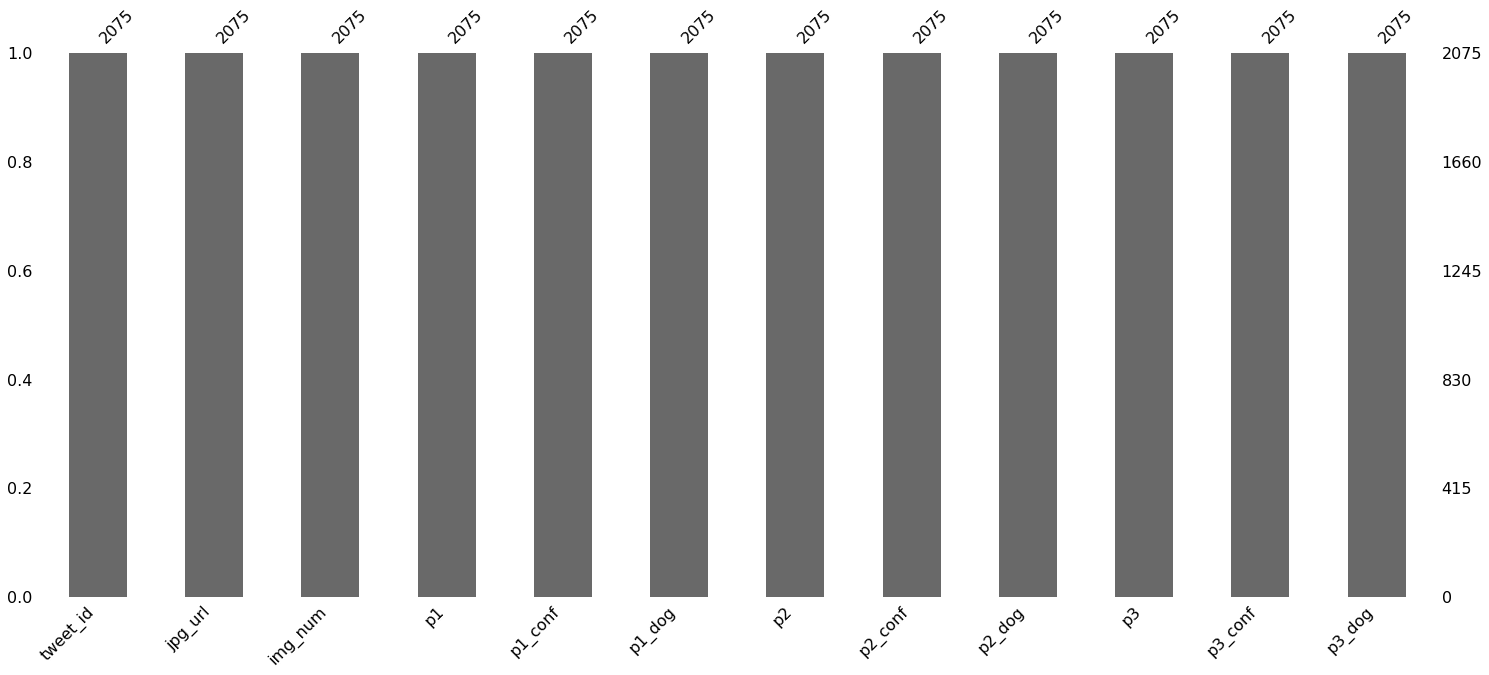

In [37]:
msno.bar(image_predictions);

* There are no missing values.

In [38]:
image_predictions[image_predictions.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

* There are no duplicated values

Investigate prediction confidence

In [39]:
numeric_features = ['p1_conf','p2_conf','p3_conf']
image_predictions[numeric_features].describe()

p1_conf       p2_conf       p3_conf
count  2075.000000  2.075000e+03  2.075000e+03
mean      0.594548  1.345886e-01  6.032417e-02
std       0.271174  1.006657e-01  5.090593e-02
min       0.044333  1.011300e-08  1.740170e-10
25%       0.364412  5.388625e-02  1.622240e-02
50%       0.588230  1.181810e-01  4.944380e-02
75%       0.843855  1.955655e-01  9.180755e-02
max       1.000000  4.880140e-01  2.734190e-01

In [40]:
#Check prediction with confidence of 1
image_predictions[image_predictions.p1_conf == 1]

tweet_id                                          jpg_url  \
106  667866724293877760  https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg   

     img_num             p1  p1_conf  p1_dog          p2       p2_conf  \
106        1  jigsaw_puzzle      1.0   False  prayer_rug  1.011300e-08   

     p2_dog       p3       p3_conf  p3_dog  
106   False  doormat  1.740170e-10   False

In [41]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [42]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [43]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Tweet json data

In [44]:
#Display the table
tweet_json_data.head()

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           8853           39467   
1  892177421306343426           6514           33819   
2  891815181378084864           4328           25461   
3  891689557279858688           8964           42908   
4  891327558926688256           9774           41048   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

*tweet json data table:*

* **tweet_id**:  a unique identification number generated by Twitter for each tweet
* **retweet_count**: number of times the Tweet has been retweeted
* **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users

In [45]:
tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


* The 'created_at' column is an object datatype instead of datetime

Check for duplicates

In [46]:
print("There are {} duplicate entries in the dataset".format(tweet_json_data.duplicated().sum()))

There are 0 duplicate entries in the dataset


In [47]:
print(twitter_archive.shape, image_predictions.shape, tweet_json_data.shape)

(2356, 17) (2075, 12) (2354, 4)


During assessment of the data, the following criteria was used to determine which data to include:

1. Only include original ratings which are not retweets
2. Only include ratings which are not replies
2. Only include ratings that images

## Assessment Findings
### Quality issues

#### *Twitter Archive Table*
1. Remove the retweets and replies included in the Twitter archive table
* Some rating denominators have the value of 0 or greater than 10
* Timestamp is an object datatype instead of datetime
* Text column contains both text from the tweet and a short version of the tweet status url
* Source columns contains the text and and a url
* Missing values in the 'expanded_urls' column
* There are missing names labelled a 'None' in the name column
* Missing counts in the dog stage category columns (doggo, floofer, pupper, puppo)
* Twitter_archive table contains ratings that lack images present in the image predictions table
* Image_pred_clean table is missing a prediction column to determine whether the image is of a dog or not, so as to determine true positives and false negatives of the neural network


#### *Image Predictions Table*
11. Create a dog breed column containing the prediction with the highest confidence
* Create a dog breed column containing the prediction with the highest confidence

#### *Tweet json data Table*
13. created_at column is not in the datetime datatype


### Tidiness issues
#### *Twitter_archive Table*
1. There are four columns that represent the same type of data, the dog category is represented in the doggo, floofer, pupper and puppo columns

####  *Image_prediction table
2. Drop redundant columns from the image predictions table

#### *Tweet_json_data* Table*
3. This data is separate from the other tweet data in the twitter_archive table
4. Merge Twitter archive table with Tweet json data table

## Cleaning Data

In [48]:
# Make copies of original pieces of data
#Create copies of the dataframes
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_predictions.copy()
tweet_json_clean = tweet_json_data.copy()

### Twitter archive table

### Issue #1: **Remove the retweets and replies included in the Twitter archive table**

#### Define: 
1. Identify and remove rows that contain observations for 'in_reply_to_status' and 'retweet_status_id'
2. Drop columns that refer to replies and retweets in the table

#### Code

In [49]:
#Check the number of rows that do not contain entries in the in_reply_to_status_id column
len(twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()])

2278

In [50]:
#Check the number of rows that contain entries in the in_reply_to_status_id column
len(twitter_archive_clean[~twitter_archive_clean.in_reply_to_status_id.isnull()])

78

In [51]:
#Check the number of rows that do not contain entries in the retweeted_status_id
len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()])

2175

In [52]:
#Check the number of rows that contain entries in the retweeted_status_id
len(twitter_archive_clean[~twitter_archive_clean.retweeted_status_id.isnull()])

181

In [53]:
#Remove the replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [54]:
#Remove the retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [55]:
#Drop the columns that relate to retweets and replies in the dataset
columns =['in_reply_to_status_id',
          'in_reply_to_user_id',
          'retweeted_status_id',
          'retweeted_status_user_id',
          'retweeted_status_timestamp']
twitter_archive_clean.drop(columns, axis=1, inplace=True)

#### Test

In [56]:
#Check the columns in twitter_archive_clean table
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2: **Some rating denominators have the value of 0 or greater than 10**
* Since the majority of ratings have the value of 10, we can assume that any value greater or lesser than 10 is an error.

#### Define
* Create a function to replace values that are greater or less than 10 with 10

#### Code

In [57]:
def correct_denominator(x):
    if x < 10:
        return 10
    elif x >= 10:
        return 10

In [58]:
#Apply the function
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].apply(correct_denominator)

#### Test

In [59]:
twitter_archive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Issue #3: **Timestamp is an object datatype instead of datetime**

#### Define
* Apply datetime function to Timestamp column

#### Code

In [60]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4: **Text column contains both text from the tweet and a short version of the tweet status url**

#### Define
* Remove the tweet status url

#### Code

In [62]:
def extract_text(x):
    x = x.split('https:')[0]
    return x

In [63]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].apply(extract_text)

#### Test

In [64]:
 for text in twitter_archive_clean.text.sample(10):
        print(text)

Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her 
This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl 
Here are two lil cuddly puppers. Both 12/10 would snug like so much 
I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) 
Meet Nugget and Hank. Nugget took Hank's bone. Hank is wondering if you would please return it to him. Both 13/10 would not intervene 
Meet Watson. He's a Suzuki Tickleboop. Leader of a notorious biker gang. Only one ear functional. 12/10 snuggable af 
This is Maks. Maks just noticed something wasn't right. 10/10 
This is Waffles. He's a ship captain in real life and in @GoodDogsGame. Must've gotten to the max level (wink) 13/10 would sail with 
Oh jeez u did me quite the spook little fella. We normally don't rate triceratops but this one seems suspiciously good. 11/10 would pet well 
This is Jeph. He is a German Bo

### Issue #5: **Source columns contains the text and and a url**

#### Define

* Create a function to extract the source of the tweet embedded in the url and apply it to the source column

#### Code

In [65]:
source_type = list(twitter_archive_clean.source.unique())
source_type

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [66]:
source_type[0].split(">")[1][:-len('</a')]

'Twitter for iPhone'

In [67]:
source_type[1].split(">")[1][:-len('</a')]

'Twitter Web Client'

In [68]:
source_type[2].split(">")[1][:-len(' - Make a Scene</a')]

'Vine'

In [69]:
source_type[3].split(">")[1][:-len('</a')]

'TweetDeck'

In [70]:
#Create a function to derive the source text from url
def extract_source(x):
    s=x.find("Vine")
    if s == -1:
        x=x.split(">")[1][:-len('</a')]
    else:
        x=x.split(">")[1][:-len(' - Make a Scene</a')]
    return x

In [71]:
sources = twitter_archive_clean.source.apply(extract_source)

In [72]:
sources.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

In [73]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(extract_source)

#### Test

In [74]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #6: **Missing values in the 'expanded_urls' column**

#### Define

* There are missing values in the 'expanded_url' columns. This will be of no consequence since no analysis utilizing data in this column will be performed. The missing values will be replace with "None" usingthe pandas fillna() function 

#### Code

In [75]:
#Check the number of missing values in the column
twitter_archive_clean.expanded_urls.isna().sum()

3

In [76]:
#Replace the missing values with None
twitter_archive_clean.expanded_urls.fillna("None", inplace =True)

#### Test

In [77]:
#Check the number of missing vales in the column
twitter_archive_clean.expanded_urls.isna().sum()

0

### Issue #7: **There are missing names labelled a 'None' in the name column**

#### Define

* Some ratings lack a dog name and hence have been filled with 'None' in the name column. This missing data is of no consequence since no analysis utilizing data in this column will be performed. 

#### Code

In [78]:
for text in twitter_archive_clean.query("name == 'None'")['text'].head():
    print(text)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) 
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof 


### Issue #8: **Missing counts in the dog stage category columns (doggo, floofer, pupper, puppo)**
* Only 394 ratings have been categorized in the twitter archive table. This leaves the majority of the dog ratings lacking a dog category classification. Therre is currently no other source for this information.

#### Test

In [79]:
(twitter_archive.loc[:, 'doggo': 'puppo']!= 'None').sum().values.sum()

394

### Issue #9: **Twitter_archive table contains ratings that lack images present in the image predictions table**

#### Define

* Remove the ratings in the twitter_archive_clean table that do not have a corresponding tweet ID in the image_predictions_clean_table

#### Code

In [80]:
#Check the value counts of matching tweet ID's in both tables
twitter_archive_clean.tweet_id.isin(image_pred_clean.tweet_id).value_counts()

True     1971
False     126
Name: tweet_id, dtype: int64

In [81]:
#Check the number of rows in the image prediction table
image_pred_clean.shape

(2075, 12)

In [82]:
#Check the counts of the ratings that have images in the image prediction table
twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_pred_clean.tweet_id)].count()

tweet_id              1971
timestamp             1971
source                1971
text                  1971
expanded_urls         1971
rating_numerator      1971
rating_denominator    1971
name                  1971
doggo                 1971
floofer               1971
pupper                1971
puppo                 1971
dtype: int64

In [83]:
#Update the twitter archive table to contain only ratings that images in the image prediction table
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_pred_clean.tweet_id)]

#### Test

In [84]:
#Check the shape of the table to see if it matches the correct number of matching tweet ID's
twitter_archive_clean.shape

(1971, 12)

In [85]:
(twitter_archive_clean.tweet_id.isin(image_pred_clean.tweet_id)).value_counts()

True    1971
Name: tweet_id, dtype: int64

In [86]:
#Check the sum of the ratings that do not have imahes in the image prediction table
(~twitter_archive_clean.tweet_id.isin(image_pred_clean.tweet_id)).sum()

0

#### Test

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Image prediction table

###  Issue #10: 
### **Image_pred_clean table is missing a prediction column to determine whether the image is of a dog or not, so as to determine true positives and false negatives of the neural network**

#### Define

* Create a dog prediction column to show whether the neural network labelled the picture as a 'dog' or 'not dog

#### Code

In [88]:
#Display the table
image_pred_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [89]:
#Check the value counts
image_pred_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [90]:
#Check the value counts
image_pred_clean.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [91]:
#Check the value counts
image_pred_clean.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [92]:
#Create a dog_prediction column with empty values
image_pred_clean['dog_prediction'] = " "

In [93]:
#Iterate over the p1_dog, p2_dog, p3_dog columns to find entries where all three predictions are False
count = 0
for ind in image_pred_clean.index:
    if image_pred_clean.p1_dog[ind] == False:
        count = count+1
    elif image_pred_clean.p2_dog[ind] == False:
            count = count+1
    elif image_pred_clean.p3_dog[ind] == False:
            count = count+1
    if count == 3:
        x = 'not_dog'
    else:
        x='dog'
    image_pred_clean['dog_prediction'][ind] = x  

In [94]:
#Change the column datatype to category
image_pred_clean.dog_prediction = image_pred_clean.dog_prediction.astype("category")

#### Test

In [95]:
#Check teh value counts
image_pred_clean.dog_prediction.value_counts()

dog        2066
not_dog       9
Name: dog_prediction, dtype: int64

### Issue #11: **Create a dog breed column containing the prediction with the highest confidence**

#### Define

* Create a breed column to store the breed prediction with the highest confidence among the three available predictions by the neural network

#### Code

In [96]:
#Display the table
image_pred_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog dog_prediction  
0  0.156665    True    Shetland_sheepdog  0.061428    True            dog  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True            dog  
2  0.138584    True           bloodhound  0.116197    True            dog  
3  0.360687    True   miniature_pinscher  0.222752    True            dog  
4  0.243682    True             Doberman  0.154629    True            dog

In [97]:
#Create breed column with empty values
image_pred_clean['breed'] = " "

#Iterate over the p1_conf, p2_conf, p3_conf columns to find the prediction with the highest confidence
for ind in image_pred_clean.index:
    if image_pred_clean.p1_conf[ind] >= max(image_pred_clean.p1_conf[ind],
                                             image_pred_clean.p2_conf[ind],
                                             image_pred_clean.p3_conf[ind]):
        image_pred_clean.breed[ind] = image_pred_clean.p1[ind]
    elif image_pred_clean.p2_conf[ind] >= max(image_pred_clean.p1_conf[ind],
                                             image_pred_clean.p2_conf[ind],
                                             image_pred_clean.p3_conf[ind]):
        image_pred_clean.breed[ind] = image_pred_clean.p2[ind]
    elif image_pred_clean.p3_conf[ind] >= max(image_pred_clean.p1_conf[ind],
                                             image_pred_clean.p2_conf[ind],
                                             image_pred_clean.p3_conf[ind]):
        image_pred_clean.breed[ind] = image_pred_clean.p3[ind]

In [98]:
#Change the column datatype to cartegory
image_pred_clean.breed = image_pred_clean.breed.str.title().astype("category")

#### Test

In [99]:
#Check the value counts of the breeds 
image_pred_clean.breed.value_counts().sort_values(ascending=False)

Golden_Retriever      150
Labrador_Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Traffic_Light           1
Bookcase                1
Bison                   1
Book_Jacket             1
Zebra                   1
Name: breed, Length: 378, dtype: int64

In [100]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2075 non-null   int64   
 1   jpg_url         2075 non-null   object  
 2   img_num         2075 non-null   int64   
 3   p1              2075 non-null   object  
 4   p1_conf         2075 non-null   float64 
 5   p1_dog          2075 non-null   bool    
 6   p2              2075 non-null   object  
 7   p2_conf         2075 non-null   float64 
 8   p2_dog          2075 non-null   bool    
 9   p3              2075 non-null   object  
 10  p3_conf         2075 non-null   float64 
 11  p3_dog          2075 non-null   bool    
 12  dog_prediction  2075 non-null   category
 13  breed           2075 non-null   category
dtypes: bool(3), category(2), float64(3), int64(2), object(4)
memory usage: 171.2+ KB


### Tweet_json_data table

### Issue #12: **created_at column is not in the datetime datatype**

#### Define

* Use the to_datetime() function to convert to datetime datatype

#### Code

In [101]:
tweet_json_clean['created_at'] = pd.to_datetime(tweet_json_clean['created_at'])

#### Test

In [102]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   int64              
 1   retweet_count   2354 non-null   int64              
 2   favorite_count  2354 non-null   int64              
 3   created_at      2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


### Tidiness

### Issue #1:  

### **There are four columns that represent the same type of data, the dog category is represented in the doggo, floofer, pupper and puppo columns**

#### Define

* There are only 394 ratings that been given a classification of dog category in the twitter archive table. They are contained in four different colums instead of one.
* Assign the values in the four different columns to one new column 'dog_stage'
* drop the redundant columns from the twitter archive table

#### Code

In [103]:
#Create an empty column labelled dog_stage
twitter_archive_clean['dog_stage'] = " "

In [104]:
#derive the entries for the dog_stage column for each rating
for ind in twitter_archive_clean.index:
    if twitter_archive_clean.doggo[ind] == 'doggo':
        twitter_archive_clean.dog_stage[ind] = 'doggo'
    elif twitter_archive_clean.floofer[ind] == 'floofer':
        twitter_archive_clean.dog_stage[ind]='floofer'
    elif twitter_archive_clean.pupper[ind] == 'pupper':
        twitter_archive_clean.dog_stage[ind]='pupper'
    elif twitter_archive_clean.puppo[ind] == 'puppo':
        twitter_archive_clean.dog_stage[ind]='puppo'  

In [105]:
#Replace the empty fileds with NOne in the dog_type column
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace(" ","None")

In [106]:
#Drop the redundant columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [107]:
twitter_archive_clean.dog_stage.value_counts()

None       1668
pupper      201
doggo        73
puppo        22
floofer       7
Name: dog_stage, dtype: int64

In [108]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 234.0+ KB


### Issue #2:  

### **Drop redundant columns from the image predictions table**

Define
* Prepare the image_pred_clean table for merging by removing redundant columns

#### Code

In [109]:
columns = ['img_num','p1','p1_dog','p2','p2_dog','p3','p3_dog']
image_pred_clean.drop(columns, axis=1, inplace=True)

#### Test

In [110]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2075 non-null   int64   
 1   jpg_url         2075 non-null   object  
 2   p1_conf         2075 non-null   float64 
 3   p2_conf         2075 non-null   float64 
 4   p3_conf         2075 non-null   float64 
 5   dog_prediction  2075 non-null   category
 6   breed           2075 non-null   category
dtypes: category(2), float64(3), int64(1), object(1)
memory usage: 100.3+ KB


### Issue #3:  

### **Merge Twitter archive table with Tweet json data table**

#### Define
* Merge both tables using using matching tweet ID's in both tables to reduce redundancy

#### Code

In [111]:
#Combine both tables using the pandas merge() function
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean, on=['tweet_id'], how='left')

In [112]:
#Drop the timestamp column since is the same as the created_at column
twitter_archive_clean.drop(['timestamp'], axis=1, inplace=True)

#### Test

In [113]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   source              1971 non-null   object             
 2   text                1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  created_at          1971 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 184.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

#### Define
* Merge the twitter_archive_clean and image_pred_clean tables 
* Store the merged table as a csv file

#### Code

In [114]:
#Use the pandas merge() function tocombine the two tables
twitter_archive_clean =pd.merge(twitter_archive_clean, image_pred_clean, on=['tweet_id'], how='left')

#### Test

In [115]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   source              1971 non-null   object             
 2   text                1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  created_at          1971 non-null   datetime64[ns, UTC]
 11  jpg_url             1971 non-null   object             
 12  p1_conf             1971 non-null 

In [116]:
#Save the table to a csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [117]:
#Import dataset
df = pd.read_csv('./twitter_archive_master.csv')
df.head()

tweet_id              source  \
0  892420643555336193  Twitter for iPhone   
1  892177421306343426  Twitter for iPhone   
2  891815181378084864  Twitter for iPhone   
3  891689557279858688  Twitter for iPhone   
4  891327558926688256  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  retweet_count  favorite_count  \
0                  10   Phineas      None           8853           39467   
1                  10     Tilly      None           6514           33819   
2                  10    Archie      None           4328           25461   
3                  10     Darla      None           8964           42908   
4                  10  Franklin      None           9774           41048   

                  created_at                                          jpg_url  \
0  2017-08-01 16:23:56+00:00  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1  2017-08-01 00:17:27+00:00  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2  2017-07-31 00:18:03+00:00  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3  2017-07-30 15:58:51+00:00  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
4  2017-07-29 16:00:24+00:00  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

    p1_conf   p2_conf   p3_conf dog_prediction        breed  
0  0.097049  0.085851  0.076110            dog       Orange  
1  0.323581  0.090647  0.068957            dog    Chihuahua  
2  0.716012  0.078253  0.031379            dog    Chihuahua  
3  0.170278  0.168086  0.040836            dog  Paper_Towel  
4  0.555712  0.225770  0.175219            dog       Basset

#### Investigate the source the tweets

In [118]:
#Check the source value counts()
df.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Check the source distribution as percentages

In [119]:
source_by_percentage=round(((df.source.value_counts()/df.source.value_counts().sum())*100),2)
source_by_percentage

Twitter for iPhone    98.02
Twitter Web Client     1.42
TweetDeck              0.56
Name: source, dtype: float64

* Most ratings were posted on Twitter using the Twitter for Iphone App

##### Visualization

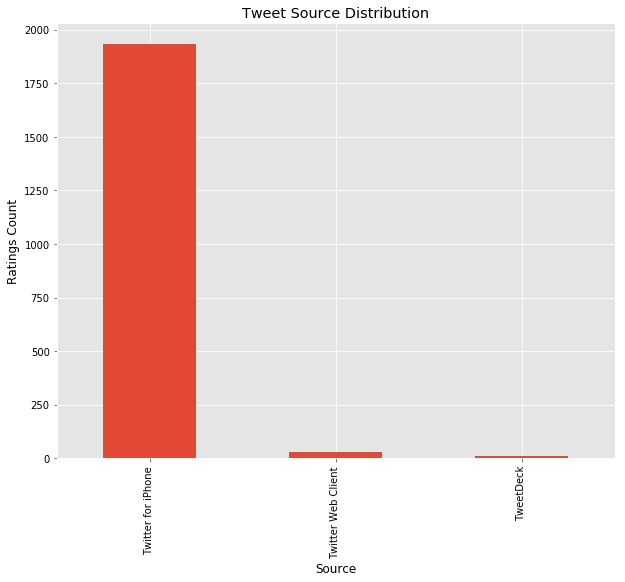

In [120]:
#Create folder to save plots created during analysis
import os
folder_name = 'plots'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#Plot this distribution of tweet sources
plt.rc('font', size=12)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
df.source.value_counts().plot(kind = 'bar', legend = False)
plt.title('Tweet Source Distribution',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Source',color = 'black')
plt.ylabel('Ratings Count',color = 'black')
plt.figsize=(10,8)
plt.savefig('plots/tweet_source_bar_vertical.png')

plt.show()

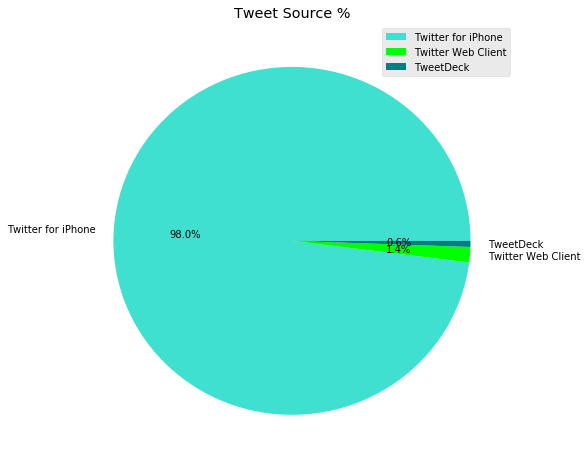

In [121]:
plt.rc('font', size=10)
fig = plt.figure(figsize =(8, 8),tight_layout=False)
plt.pie(source_by_percentage, labels =('Twitter for iPhone','Twitter Web Client','TweetDeck '),colors=('turquoise','lime','teal'),autopct='%1.1f%%');
plt.title('Tweet Source %')
plt.savefig('plots/tweet_source_pie_chart.png')
plt.legend()
plt.show()

#### Investigate the relationship between Retweets, Favorites and Ratings numerator

In [122]:
#Check for correlation between the variables
df[['favorite_count','retweet_count','rating_numerator']].corr()

favorite_count  retweet_count  rating_numerator
favorite_count          1.000000       0.913014          0.010876
retweet_count           0.913014       1.000000          0.014664
rating_numerator        0.010876       0.014664          1.000000

* There is no correlation between dog ratings by means of the rating numerator with the number of retweets and favorites.
* There is a strong correlation between retweet counts and favorite counts of 0.9.


##### Visualization

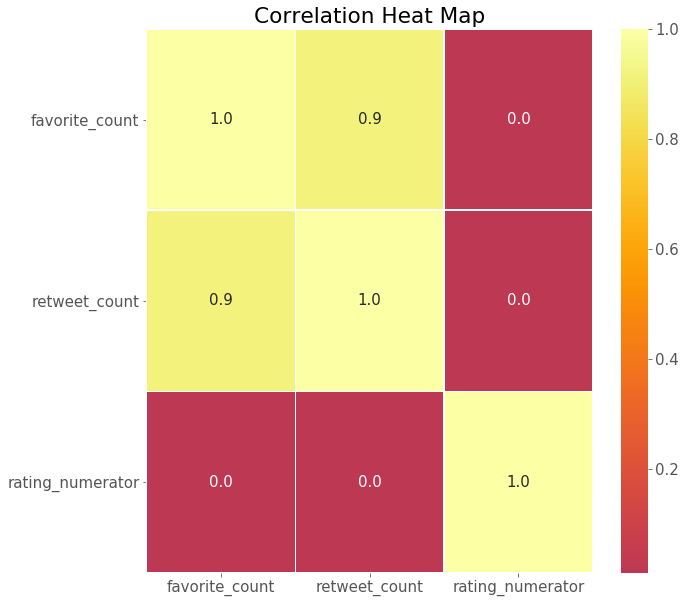

In [123]:
import seaborn as sns
plt.rc('font', size=15)
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[['favorite_count','retweet_count',
                'rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = 'inferno', center = 0)
bottom, top = plt.ylim() 
#bottom += 0.5 
#top -= 0.5
plt.ylim(bottom, top)
plt.yticks(rotation=0);
plt.title('Correlation Heat Map');
plt.savefig('plots/favorites_vs_retweets_heat_map.png')
plt.show()

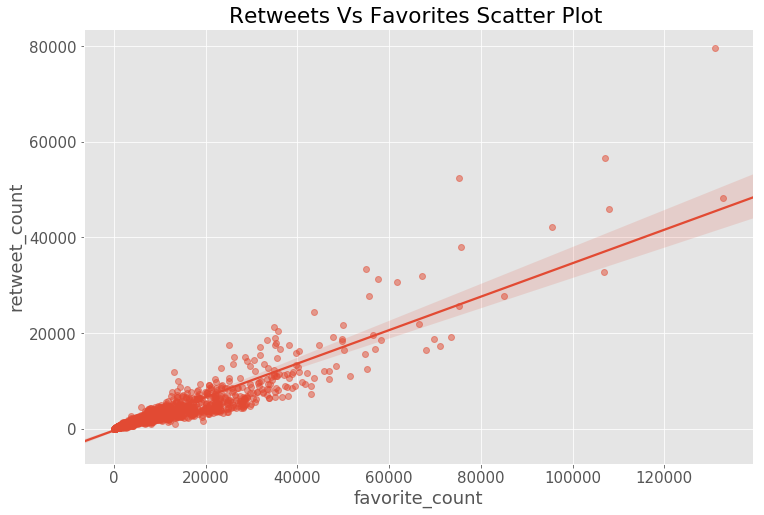

In [124]:
plt.rc('font', size=15)
plt.figure(figsize=(12,8))
sns.regplot(x=df['favorite_count'], y=df['retweet_count'],scatter_kws={'alpha':0.5})
plt.title('Retweets Vs Favorites Scatter Plot ',color = 'black')
plt.savefig('plots/favorites_vs_retweets_corr.png')
plt.show()

#### Investigate Dog Breeds

In [125]:
#Check the distribution of the top 10 dog breeds
df.breed.value_counts().iloc[:10]

Golden_Retriever      137
Labrador_Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy_Poodle             37
Malamute               29
Name: breed, dtype: int64

In [126]:
#Obtain the names of the top 10 dog breeds
top10_dogs = list(df.breed.value_counts().sort_values(ascending=False).iloc[:10].index)
top10_dogs

['Golden_Retriever',
 'Labrador_Retriever',
 'Pembroke',
 'Chihuahua',
 'Pug',
 'Chow',
 'Samoyed',
 'Pomeranian',
 'Toy_Poodle',
 'Malamute']

In [127]:
#Obtain the urls for visualization
breed_url=[]
x=0
for dog in top10_dogs:
    print(top10_dogs[x])
    dog = top10_dogs[x]
    mask = (df['breed'] == dog)
    url = list(df.jpg_url[mask].head(1).values)
    breed_url.append(url)
    print(url)
    x=x+1

Golden_Retriever
['https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg']
Labrador_Retriever
['https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg']
Pembroke
['https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg']
Chihuahua
['https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg']
Pug
['https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg']
Chow
['https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg']
Samoyed
['https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg']
Pomeranian
['https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg']
Toy_Poodle
['https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg']
Malamute
['https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg']


In [128]:
(str(breed_url[0])[1:-1]).strip("''")

'https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg'

In [129]:
#Prepare the jpg urls for use in get() function of the requests library
from PIL import Image
from io import BytesIO
import os

count = 0
for url in breed_url:
    breed_url[count] = (str(breed_url[count])[1:-1]).strip("''")
    count=count+1

#Check the values in the list
breed_url

#Create a folder to store the top breed images
folder_name = 'top_breed_pictures'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

count=0
for url in breed_url:
    picture = requests.get(breed_url[count])
    i = Image.open(BytesIO(picture.content))
    image_file_format = breed_url[count].split('.')[-1]
    breed_name = top10_dogs[count]
    i.save(folder_name + "/" + breed_name + '.' + image_file_format)
    count=count+1

In [130]:
#Obtain the highest retweet count
df.retweet_count.sort_values(ascending=False).iloc[:1].values

array([79515])

In [131]:
#Obtain the highest favorite count
df.favorite_count.sort_values(ascending=False).iloc[:1].values

array([132810])

In [132]:
#check the highest retweet count
df.query('retweet_count >= 79515')

tweet_id              source  \
769  744234799360020481  Twitter for iPhone   

                                                  text  \
769  Here's a doggo realizing you can stand in a po...   

                                         expanded_urls  rating_numerator  \
769  https://twitter.com/dog_rates/status/744234799...                13   

     rating_denominator  name dog_stage  retweet_count  favorite_count  \
769                  10  None     doggo          79515          131075   

                    created_at  \
769  2016-06-18 18:26:18+00:00   

                                               jpg_url   p1_conf   p2_conf  \
769  https://pbs.twimg.com/ext_tw_video_thumb/74423...  0.825333  0.044681   

      p3_conf dog_prediction               breed  
769  0.018442            dog  Labrador_Retriever

In [133]:
#Check the highest favorite count
df.query('favorite_count >= 132810')

tweet_id              source  \
306  822872901745569793  Twitter for iPhone   

                                                  text  \
306  Here's a super supportive puppo participating ...   

                                         expanded_urls  rating_numerator  \
306  https://twitter.com/dog_rates/status/822872901...                13   

     rating_denominator  name dog_stage  retweet_count  favorite_count  \
306                  10  None     puppo          48265          132810   

                    created_at  \
306  2017-01-21 18:26:02+00:00   

                                             jpg_url   p1_conf   p2_conf  \
306  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg  0.196015  0.160329   

      p3_conf dog_prediction             breed  
306  0.069126            dog  Lakeland_Terrier

* The Golden Retriever is the most popular dog in terms of occuring the most. The top 5 breeds in terms of popularity occur in the following order

        1. Golden_Retriever
        2. Labrador_Retriever
        3. Pembroke
        4. Chihuahua
        5. Pug

##### Visualization

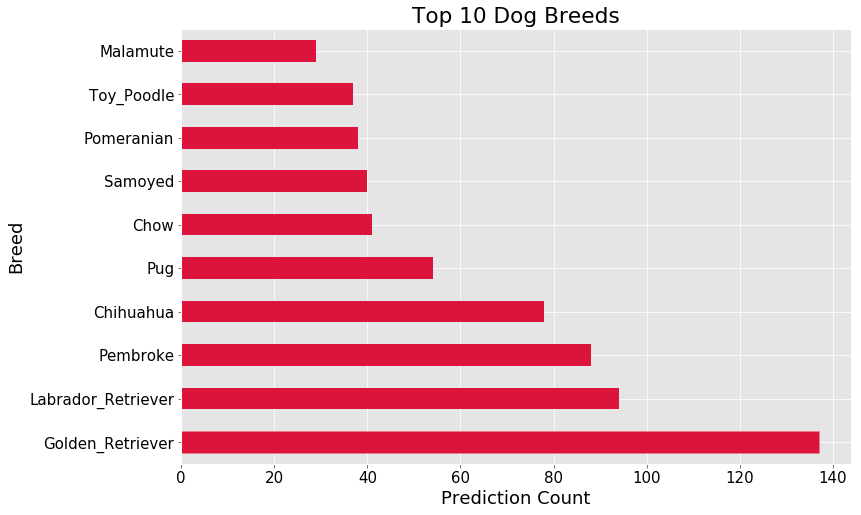

In [134]:
plt.figure(figsize=(12,8))
df.breed.value_counts().iloc[:10].sort_values(ascending=False).plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.rc('font', size=15)

plt.title('Top 10 Dog Breeds',color = 'black')
plt.xlabel('Prediction Count',color = 'black')
plt.ylabel('Breed',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('plots/dog_breed_bar_horizontal.png')

plt.show()

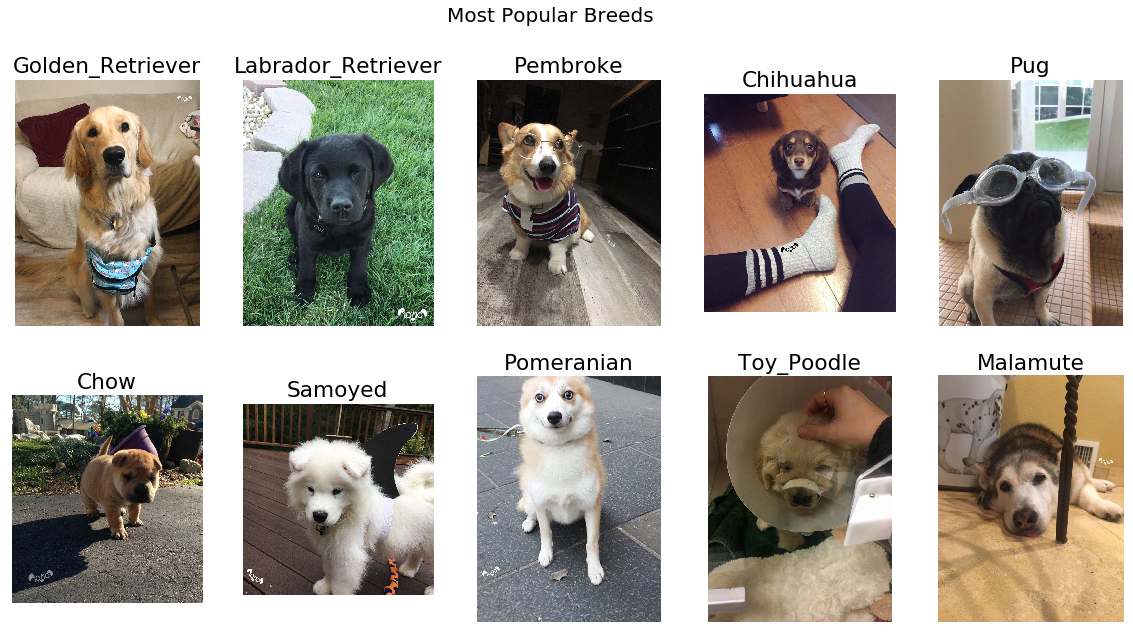

In [135]:
#Obtain the pictures of the top breeds
Golden_Retriever = plt.imread('./top_breed_pictures/Golden_Retriever.jpg')
Labrador_Retriever = plt.imread('./top_breed_pictures/Labrador_Retriever.jpg')
Pembroke = plt.imread('./top_breed_pictures/Pembroke.jpg')
Chihuahua = plt.imread('./top_breed_pictures/Chihuahua.jpg')
Pug = plt.imread('./top_breed_pictures/Pug.jpg')
Chow = plt.imread('./top_breed_pictures/Chow.jpg')
Samoyed = plt.imread('./top_breed_pictures/Samoyed.jpg')
Pomeranian = plt.imread('./top_breed_pictures/Pomeranian.jpg')
Toy_Poodle = plt.imread('./top_breed_pictures/Toy_Poodle.jpg')
Malamute = plt.imread('./top_breed_pictures/Malamute.jpg')

images = [Golden_Retriever, Labrador_Retriever,
          Pembroke, Chihuahua, Pug, Chow, Samoyed,
          Pomeranian, Toy_Poodle, Malamute]

label= ['Golden_Retriever', 'Labrador_Retriever',
          'Pembroke', 'Chihuahua', 'Pug', 'Chow', 'Samoyed',
          'Pomeranian', 'Toy_Poodle', 'Malamute']

NUM_ROWS = 2
IMGs_IN_ROW = 5

f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20,10))

count=0
for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        ax.imshow(images[j*IMGs_IN_ROW+i])
        ax.set_title(label[count])    #(f'image {j*IMGs_IN_ROW+i+1}')
        ax.grid(False)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        count=count+1

title = 'Most Popular Breeds'
f.suptitle(title,fontsize=20)
plt.box(False)
plt.grid(False)
plt.savefig('plots/most_popular_breeds.png')
plt.show()  

#### Investigate Accuracy of Dog Prediction

In [136]:
#Check the valuecounts of the predictions madeby the neural network
df.dog_prediction.value_counts()

dog        1962
not_dog       9
Name: dog_prediction, dtype: int64

* The neural network classified 9 out of 1962 images as not being dogs.

Check the images classified as 'not_dog'

In [137]:
#Gather the jpg urls 
pic_urls = image_pred_clean.query("dog_prediction == 'not_dog'")['jpg_url'].values
pic_urls

array(['https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg',
       'https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg',
       'https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg',
       'https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg',
       'https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg',
       'https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg',
       'https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg',
       'https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg',
       'https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg'], dtype=object)

In [138]:
#Download the images classified as not dogs
folder_name = 'not_dog_pictures'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

count=0
for url in pic_urls:
    picture = requests.get(pic_urls[count])
    i = Image.open(BytesIO(picture.content))
    image_file_format = pic_urls[count].split('.')[-1]
    rank_title = pic_urls[count].split(".")[-2].split("/")[-1]
    i.save(folder_name + "/" + rank_title + '.' + image_file_format)
    count=count+1

In [139]:
image_pred_clean.query("dog_prediction == 'not_dog'")['breed']

8        Shopping_Cart
9     Miniature_Poodle
10    Golden_Retriever
11       Gordon_Setter
12        Walker_Hound
13                 Pug
14          Bloodhound
15               Lhasa
16      English_Setter
Name: breed, dtype: category
Categories (378, object): ['Acorn_Squash', 'Afghan_Hound', 'African_Crocodile', 'African_Grey', ..., 'Wooden_Spoon', 'Wool', 'Yorkshire_Terrier', 'Zebra']

##### Visualizations

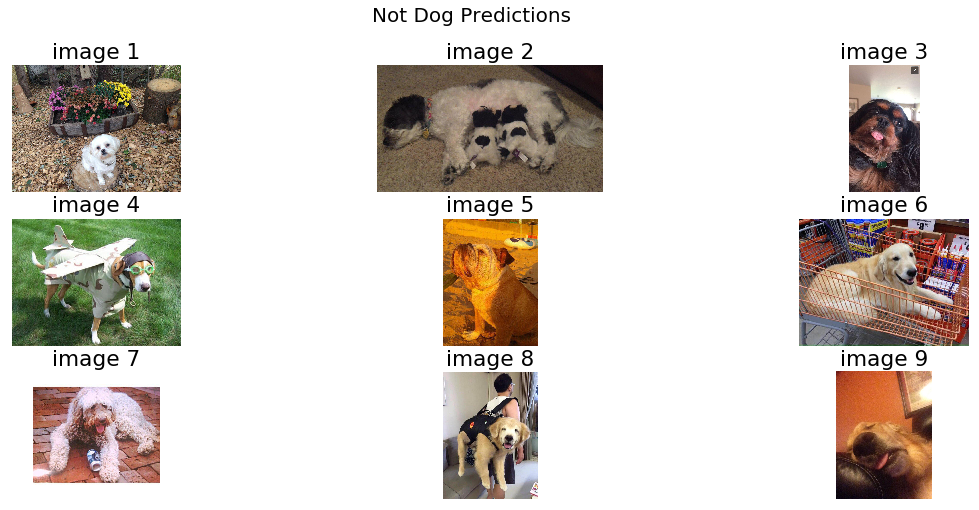

In [140]:
#Display the images

img1 = plt.imread('./not_dog_pictures/CT51-JJUEAA6hV8.jpg')
img2 = plt.imread('./not_dog_pictures/CT54YGiWUAEZnoK.jpg')
img3 = plt.imread('./not_dog_pictures/CT5cN_3WEAAlOoZ.jpg')
img4 = plt.imread('./not_dog_pictures/CT5d9DZXAAALcwe.jpg')
img5 = plt.imread('./not_dog_pictures/CT5m4VGWEAAtKc8.jpg')
img6 = plt.imread('./not_dog_pictures/CT5PY90WoAAQGLo.jpg')
img7 = plt.imread('./not_dog_pictures/CT5Qw94XAAA_2dP.jpg')
img8 = plt.imread('./not_dog_pictures/CT5Vg_wXIAAXfnj.jpg')
img9 = plt.imread('./not_dog_pictures/CT5w9gUW4AAsBNN.jpg')


images = [img1,img2,img3,img4,img5,img6,img7,img8,img9]


NUM_ROWS = 3
IMGs_IN_ROW = 3

f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20,8))


for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        ax.imshow(images[j*IMGs_IN_ROW+i])
        ax.set_title(f'image {j*IMGs_IN_ROW+i+1}')
        ax.grid(False)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        

title = 'Not Dog Predictions'
f.suptitle(title,fontsize=20)
plt.box(False)
plt.grid(False)
plt.savefig('plots/not_dog_predictions.png')
plt.show()  

#### Investigate Dog Stages

In [141]:
df.dog_stage.value_counts().sort_values(ascending=False).iloc[1:5]

pupper     201
doggo       73
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [142]:
#Create a mask to filter out dogs that have not been categorized into a dog stage
stages = df.dog_stage != 'None'

* Pupper is the most popular dog stage in the dataset, followed by doggo and puppo and lastly floffer.

##### Visualizations

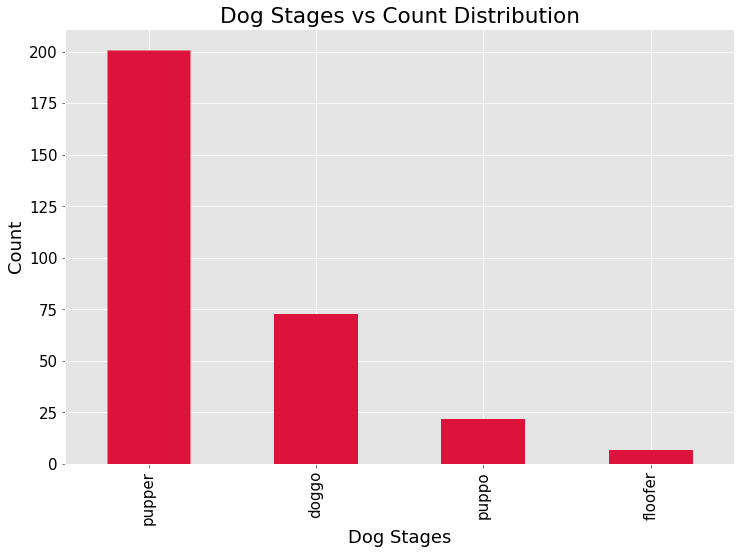

In [143]:
plt.figure(figsize=(12,8))
df.dog_stage.value_counts().sort_values(ascending=False).iloc[1:5].plot.bar(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.rc('font', size=15)

plt.title('Dog Stages vs Count Distribution',color = 'black')
plt.xlabel('Dog Stages',color = 'black')
plt.ylabel('Count',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('plots/dog_stage_bar_chart.png')

plt.show()

In [144]:
#Plot retweet count vs dog stage
fig = px.box(df[stages], x="dog_stage", y="retweet_count", points="all",
            width=800, height=500, title = "Retweet count vs Dog Stage")


fig.show()

In [145]:
#plot favorite count vs dog stage
fig = px.box(df[stages], x="dog_stage", y="favorite_count", points="all",
            width=800, height=500, title="Favorite Count vs Dog Stage")
fig.show()

### Insights:
1. Most ratings were posted on Twitter using the Twitter for Iphone App.



2. There is no correlation between dog ratings in regards to the rating numerator with the number of retweets and favorites.

    * There is a strong correlation between retweet counts and favorite counts of 0.9.
    * A scatter plot showed a strong positive correlation between retweet counts and favorite counts. This can be translated as the more retweets a tweet has, the higher the likelyhood of having more more favorite counts.
    
    

3. The Golden Retriever is the most popular dog in terms of occuring the most. The top 5 breeds in terms of popularity occur in the following order

        1. Golden_Retriever
        2. Labrador_Retriever
        3. Pembroke
        4. Chihuahua
        5. Pug

    * However, the dog breed with the highest number of retweet counts is the Labrador Retriever and the highest number of favorite counts is the Lakeland Terrier.


4. The neural network had a success rate of 99.5% in predicting whether an image was a dog or not.

    * The other 9 predictions have been assigned a dog breed, eventhough the neural network claasified them as not dogs by assigning False to all three predictions.
    

5. Pupper is the most popular dog stage in the dataset, followed by doggo and puppo and lastly floffer.

    * Doggo has the highest retweet count, followed by puppo and pupper.